In [61]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [62]:
data_path = "emails.csv"
message_dataset = pd.read_csv(data_path, engine='python')
message_dataset.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [63]:
message_dataset.shape

(5728, 2)

<AxesSubplot:>

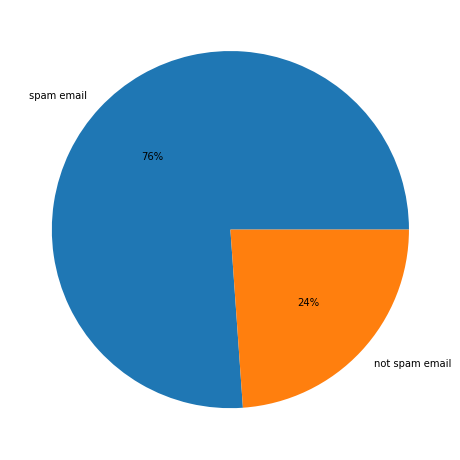

In [64]:
plt.rcParams["figure.figsize"] = [8,10]
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%', labels=["spam email", "not spam email"], ylabel='')

In [65]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
message_dataset['text_without_sw'] = message_dataset['text'] .apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


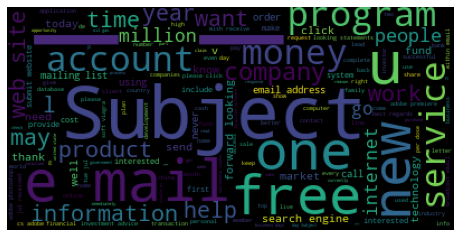

In [66]:
message_dataset_spam = message_dataset[message_dataset["spam"] == 1]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

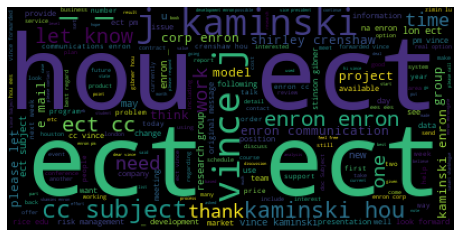

In [67]:
message_dataset_ham = message_dataset[message_dataset["spam"] == 0]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(message_dataset_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [68]:
X = message_dataset["text"]
y = message_dataset["spam"]

def clean_text(doc):

    document = re.sub('[^a-zA-Z]', ' ', doc)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\s+', ' ', document)

    return document

In [69]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

In [70]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

In [72]:
y_pred = spam_detector.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('\nCONFUSION MATRIX:\n')
print(confusion_matrix(y_test,y_pred))
print('\nCLASSIFICATION REPORT:\n')
print(classification_report(y_test,y_pred))
print('\nACCURACY SCORE:\n')
print(accuracy_score(y_test,y_pred))

NameError: name 'colored' is not defined